# Machine Learning Model which identifies from the observations of space taken by the SDSS to be either a star, galaxy or quasar.

In [2]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#acquiring the data
Skyserver_df=pd.read_csv("Skyserver.csv")

In [4]:
#analysing the data
print(Skyserver_df.columns)

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')


In [5]:
#previewing the data
Skyserver_df.sample(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
4022,1.237650e+18,160.554403,1.193615,18.32633,16.94937,16.27960,15.86651,15.59272,756,301,6,299,5.697620e+17,GALAXY,0.066973,506,52022,207
9218,1.237650e+18,164.831258,0.793791,19.48619,18.29178,17.74865,17.46060,17.30389,756,301,5,327,3.119740e+17,GALAXY,0.038446,277,51908,362
2413,1.237650e+18,171.065067,-0.446555,19.25748,19.19962,18.96415,18.89772,18.91018,756,301,2,369,3.152680e+17,QSO,1.409506,280,51612,57
1841,1.237650e+18,218.750912,-0.768421,18.42516,18.57071,18.43024,18.40806,18.35974,752,301,2,502,3.445260e+17,STAR,-0.000120,306,51637,4
8908,1.237650e+18,118.880849,43.613806,19.58542,17.95851,17.06153,16.59384,16.28785,1350,301,3,92,4.909260e+17,GALAXY,0.106200,436,51883,122


In [6]:
#checking the structure of the dataset
Skyserver_df.shape

(10000, 18)

In [7]:
Skyserver_df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [8]:
Skyserver_df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in Skyserver_df.columns:
    Skyserver_df[col] = le_x.fit_transform(Skyserver_df[col])
Skyserver_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,5641,2,1681,267,182,490
1,0,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,2267,2,1437,49,6,540
2,0,5405,4118,8203,8155,7210,6793,6350,3,0,3,257,1289,0,8222,21,80,512
3,0,5458,3910,1569,1960,2431,2897,3415,3,0,3,258,5642,2,1162,267,182,509
4,0,5462,4064,1206,1255,3347,4943,5701,3,0,3,258,5642,2,3501,267,182,511


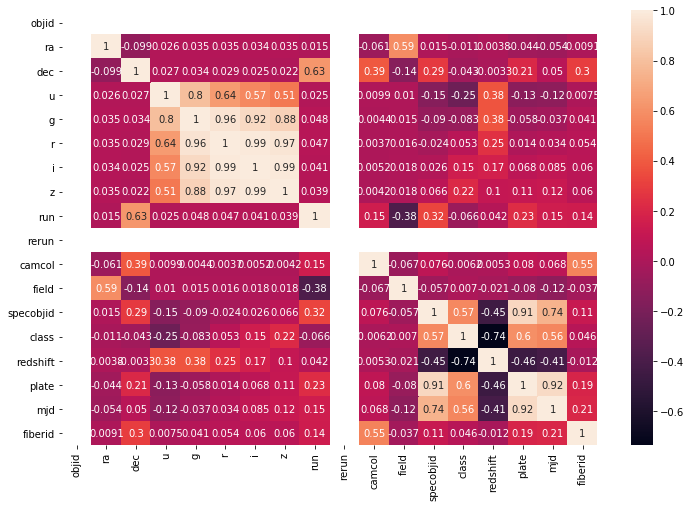

In [10]:
#checking for the correlation
corr_hmap=Skyserver_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_hmap,annot=True)

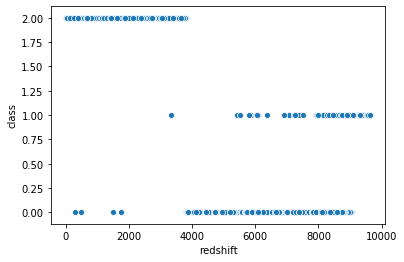

In [11]:
#printing different plot
sns.scatterplot(data=Skyserver_df,x='redshift',y='class')

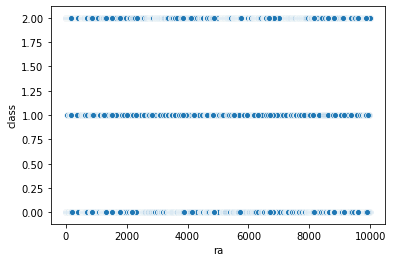

In [12]:
sns.scatterplot(data=Skyserver_df,x='ra',y='class')

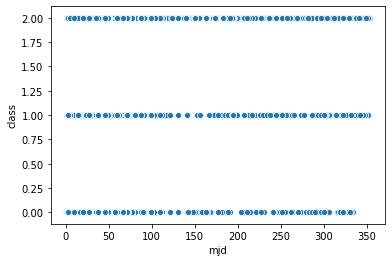

In [18]:
sns.scatterplot(data=Skyserver_df,x='mjd',y='class')

objid           AxesSubplot(0.125,0.799681;0.168478x0.0803191)
ra           AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
dec          AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
u            AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
g               AxesSubplot(0.125,0.703298;0.168478x0.0803191)
r            AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
i            AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
z            AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
run             AxesSubplot(0.125,0.606915;0.168478x0.0803191)
rerun        AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
camcol       AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
field        AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
specobjid       AxesSubplot(0.125,0.510532;0.168478x0.0803191)
class        AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
redshift     AxesSubplot(0.529348,0.510532;0.168478x0.0803191)
plate        AxesSubplot(0.731522,0.510532;0.168478x0.0

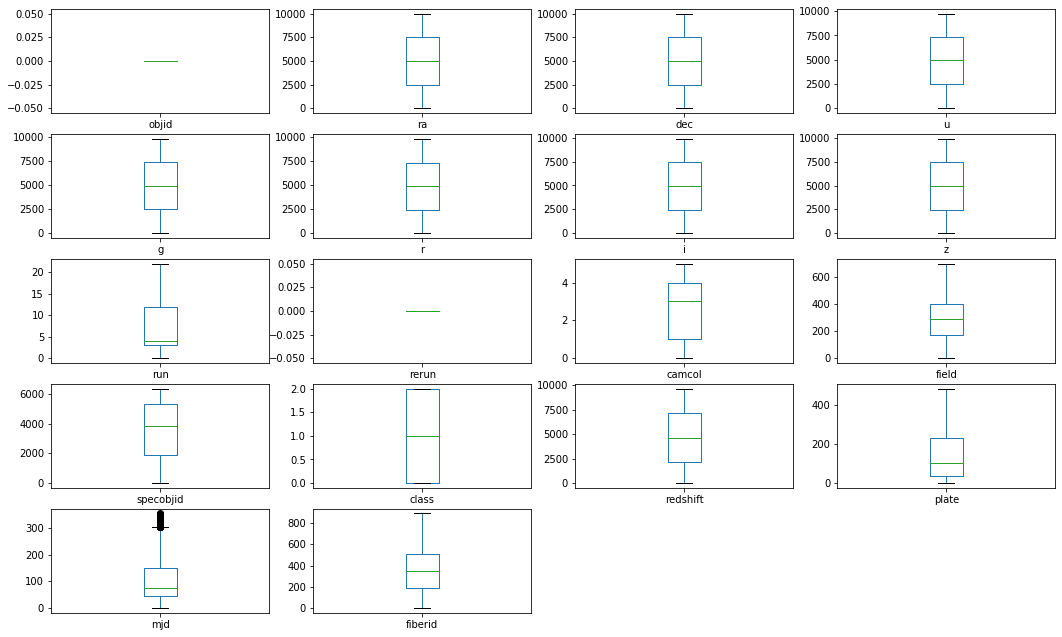

In [17]:
#checking for the outliers
Skyserver_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(18,18))

In [19]:
#checking the skewness before removing the outliers
Skyserver_df.skew()

objid        0.000000
ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.978221
rerun        0.000000
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.888700
mjd          1.177842
fiberid      0.150256
dtype: float64

In [24]:
#removing outliers
z_score=np.abs(zscore(Skyserver_df))
print(Skyserver_df.shape)
Skyserver_df_final=Skyserver_df.loc[(z_score<3).all(axis=1)]
print(Skyserver_df_final.shape)

(10000, 18)
(0, 18)


In [26]:
#Now separating input and output variable
x=Skyserver_df.drop(['class'],axis=1)
y=Skyserver_df['class']
print(x.shape)
print(y.shape)

(10000, 17)
(10000,)


In [27]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.        ,  0.13111625, -0.33584465, ...,  1.05803093,
         1.04371537,  0.69972546],
       [ 0.        ,  0.13596599, -0.29600748, ..., -0.75592562,
        -1.21431467,  0.94908666],
       [ 0.        ,  0.14046932, -0.30536056, ..., -0.98891087,
        -0.26491568,  0.80944439],
       ...,
       [ 0.        , -1.27600184,  1.10730009, ...,  2.65564405,
         3.08364023,  1.35305179],
       [ 0.        , -1.27773389,  1.11007137, ..., -0.24002972,
        -0.81659347, -0.60692719],
       [ 0.        , -1.27426979,  1.11145701, ..., -0.24002972,
        -0.81659347, -0.5869783 ]])

In [28]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [29]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.983
random state:  43  accuracy score:  0.98
random state:  44  accuracy score:  0.986
random state:  45  accuracy score:  0.988
random state:  46  accuracy score:  0.976
random state:  47  accuracy score:  0.98
random state:  48  accuracy score:  0.98
random state:  49  accuracy score:  0.988
random state:  50  accuracy score:  0.983
random state:  51  accuracy score:  0.976
random state:  52  accuracy score:  0.99
random state:  53  accuracy score:  0.984
random state:  54  accuracy score:  0.977
random state:  55  accuracy score:  0.98
random state:  56  accuracy score:  0.987
random state:  57  accuracy score:  0.991
random state:  58  accuracy score:  0.973
random state:  59  accuracy score:  0.985
random state:  60  accuracy score:  0.989
random state:  61  accuracy score:  0.982
random state:  62  accuracy score:  0.984
random state:  63  accuracy score:  0.985
random state:  64  accuracy score:  0.982
random state:  65  accuracy score:  

random state:  79  accuracy score:  0.981

max accuracy score at random state: 57  for the model  SVC  is:  0.99




In [30]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.9835555555555555
Cross Validation Score(Std):  0.002266230894930109

Model name:  KNN
Cross Validation Score(Mean):  0.9593333333333334
Cross Validation Score(Std):  0.0062893207547044

Model name:  DT
Cross Validation Score(Mean):  0.9845555555555556
Cross Validation Score(Std):  0.0006478835438716719

Model name:  GNB
Cross Validation Score(Mean):  0.9261111111111111
Cross Validation Score(Std):  0.003767961101736234

Model name:  SVC
Cross Validation Score(Mean):  0.9828888888888889
Cross Validation Score(Std):  0.002314740739555496



In [31]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",99.2,98.355556
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",97.7,95.933333
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",99.5,98.455556
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",94.1,92.611111
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",99.0,98.288889


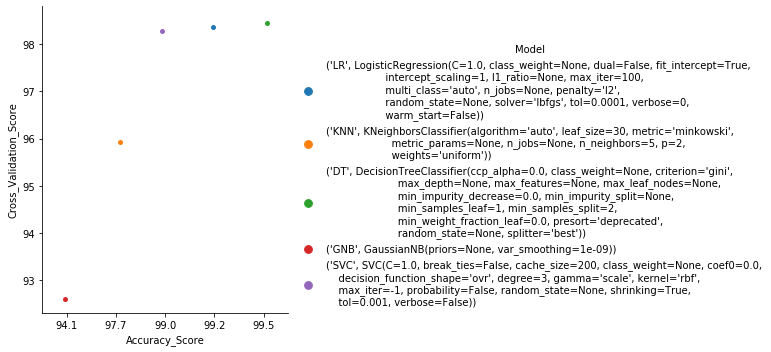

In [46]:
#evaluating the results using plots
sns.catplot(data=result,x='Accuracy_Score',y='Cross_Validation_Score',hue='Model')

In [32]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=59,test_size=0.10)
model_name=tree.DecisionTreeClassifier()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.996
confusion matrix: 
[[516   3   0]
 [  0  87   0]
 [  1   0 393]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       519
           1       0.97      1.00      0.98        87
           2       1.00      1.00      1.00       394

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[0 0 0 0 0 1 0 2 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 2 2 0 0 0 2 2 2
 0 2 0 2 2 2 2 0 2 0 2 2 1 2 2 0 1 2 0 0 0 1 2 0 2 0 0 0 0 0 0 0 1 2 0 0 0
 0 0 1 2 2 2 0 0 0 2 0 2 0 2 2 0 2 2 2 2 0 2 0 1 1 0 2 2 0 2 0 1 0 2 0 0 0
 2 0 0 2 2 0 1 0 0 2 2 2 0 0 0 0 2 0 2 0 0 1 2 0 0 2 2 0 0 2 2 2 2 1 2 0 1
 2 2 2 0 0 2 0 1 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 1 0 0 1 0
 2 2 0 0 0 1 2 0 2 2 2 2 2 0 2 1 2 2 2 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2
 0 2 0 0 0 2 0 2 2 2 1 2 0 2 0 0 0 0 2 0 2 0 2 2 0 0 0 1 

In [33]:
#saving the model as pickle in a file
pickle.dump(model_name,open('DT_Skyserver_data.pkl','wb'))

In [34]:
#loading the model for testing
loaded_model=pickle.load(open('DT_Skyserver_data.pkl','rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,